In [11]:
import sqlite3
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### clean weather data

In [12]:
weather_mdw = pd.read_csv("MDW.csv", index_col = "Date", parse_dates = ["Date"],
                          names = ["Date", "Temperature", "Precipitation"])
weather_mdw.head()
weather_mdw = weather_mdw[["Temperature", "Precipitation"]].resample("1D").mean()
weather_mdw.to_csv("weather.csv")

### Create weather table in sqlite3

In [13]:
conn = sqlite3.connect('database.db')
print("Opened database successfully")
c = conn.cursor()
c.execute("DROP TABLE IF EXISTS WEATHER;")
c.execute('''CREATE TABLE IF NOT EXISTS WEATHER
       (DATE DATE PRIMARY KEY NOT NULL,
       TEMPERATURE REAL NOT NULL,
       PRECIPITATION REAL NOT NULL)''')
print("Table created successfully")
conn.commit()
conn.close()

Opened database successfully
Table created successfully


### Insert records

In [14]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
mdw_csv = open("weather.csv", "r")
mdw_csv.readline()
for line in mdw_csv:
    line = line.strip()
    arr = line.split(",")
    try:
        c.execute("INSERT INTO  WEATHER(DATE,TEMPERATURE,PRECIPITATION) VALUES (?,?,?)",(arr[0], arr[1], arr[2]));
    except Exception as e:
        pass
conn.commit()
print("Records created successfully")
conn.close()

Opened database successfully
Records created successfully


### clean violation data

In [18]:
vdf_csv = open("Export_Output.csv", "r")
output = open("violation.csv", "w")
vdf_csv.readline()
for line in vdf_csv:
    line = line.strip()
    arr = line.split(",")
    dt = datetime.strptime(arr[3],"%m/%d/%Y %H:%M")
    arr[3] = dt.strftime("%Y-%m-%d")
    output.write(",".join(arr) + "\n")
output.close()
print("done")

done


### Create violation table in sqlite3

In [19]:
conn = sqlite3.connect('database.db')
print("Opened database successfully")
c = conn.cursor()
c.execute("DROP TABLE IF EXISTS VIOLATION;")
c.execute('''CREATE TABLE VIOLATION
       (CAMERAID INTEGER NOT NULL,
       DATE DATE NOT NULL,
       INTER TEXT,
       ADDRESS TEXT,
       VIOLATION INTEGER,
       LATITUDE REAL,
       LONGITUDE REAL,
       ZIPCODE INTEGER NOT NULL,
       PRIMARY KEY(CAMERAID, DATE)
       )''')
print("Table created successfully")
conn.commit()
conn.close()

Opened database successfully
Table created successfully


### Insert records

In [20]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
mdw_csv = open("violation.csv", "r")
mdw_csv.readline()
for line in mdw_csv:
    line = line.strip()
    arr = line.split(",")
    try:
        c.execute("INSERT INTO  VIOLATION(CAMERAID, DATE,INTER, ADDRESS, VIOLATION, LATITUDE, LATITUDE, ZIPCODE) \
                  VALUES (?,?,?,?,?,?,?,?)",(arr[1], arr[3], arr[0], arr[2],arr[4], arr[5], arr[6], arr[7]));
    except Exception as e:
        pass
conn.commit()
print("Records created successfully")
conn.close()

Opened database successfully
Records created successfully


### zipcode和violation的关系

Opened database successfully
Operation done successfully
   violation  zipcode
0   9.346319    60607
1   3.981914    60608
2   5.331984    60609
3   7.315789    60610
4  12.584320    60611


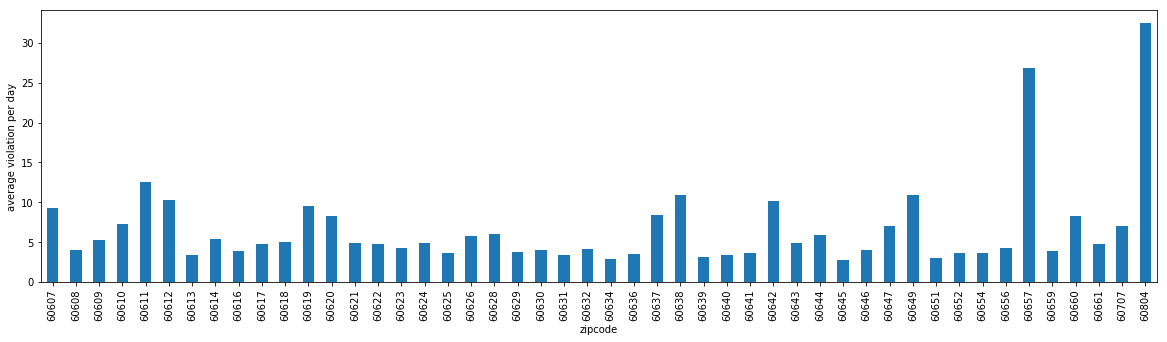

In [174]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select zipcode, avg(violation) as violation \
from weather as w join violation as v on w.DATE=v.DATE group by zipcode order by zipcode;")

zipcodes = []
violations = []


for row in cursor:
    zipcodes.append(row[0])
    violations.append(float(row[1]))
   
print("Operation done successfully")

conn.close()

d={'zipcode': zipcodes, 'violation': violations}
df=pd.DataFrame(data=d)
print(df.head())

ax = df.set_index("zipcode")["violation"].plot(kind='bar', figsize = (20, 5))
ax.set_ylabel("average violation per day")


### 摄像头和violation的关系

Opened database successfully
Operation done successfully


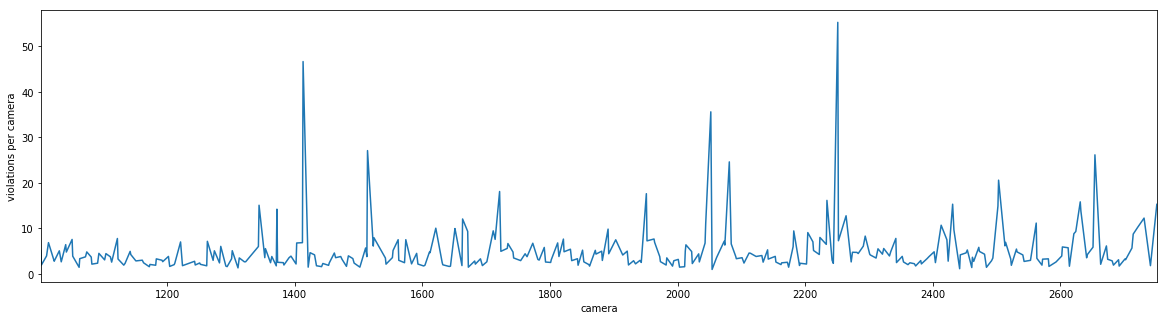

In [266]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")

cursor = c.execute("select cameraid, avg(violation) as camera \
from weather as w join violation as v on w.DATE=v.DATE where cameraid<=2800 and cameraid>=1000 group by cameraid order by cameraid;")

cameras = []
violations = []


for row in cursor:
    cameras.append(row[0])
    violations.append(float(row[1]))
   
print("Operation done successfully")

conn.close()

d={'camera': cameras, 'violation': violations}
df=pd.DataFrame(data=d)

ax = df.set_index("camera")["violation"].plot(figsize = (20, 5))
ax.set_ylabel("violations per camera")

### 每一年圣诞节（2014.12.24/2015.12.24/2015.12.24）

48 48 48 48


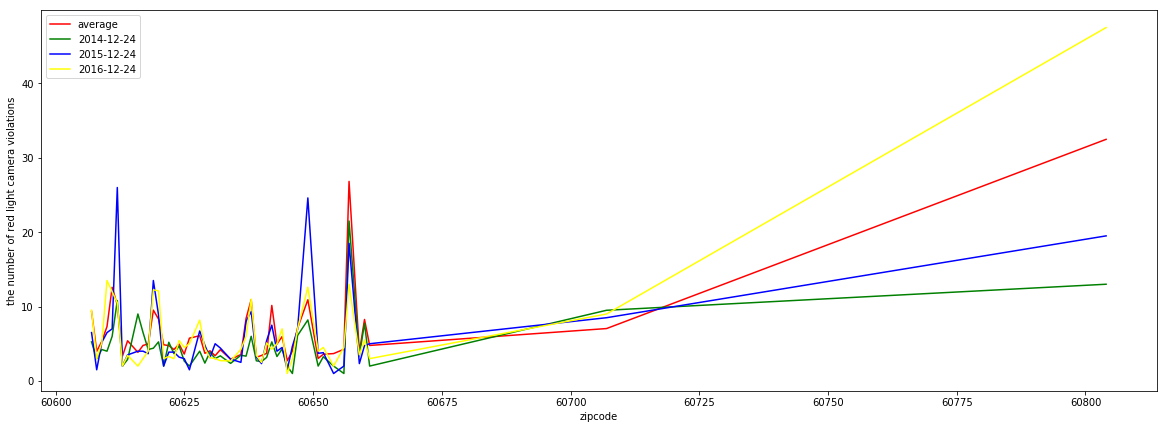

In [195]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

zipcodes = []
violations4=[]
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE group by zipcode order by zipcode;")
for row in cursor:
    zipcodes.append(row[0])
    violations4.append(float(row[1]))
    
violations1 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2014-12-24'group by zipcode order by zipcode;")
for row in cursor:
    violations1.append(float(row[1]))

violations2 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2015-12-24'  group by zipcode order by zipcode;")
for row in cursor:
    violations2.append(float(row[1]))

violations3 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-12-24' group by zipcode order by zipcode;")
for row in cursor:
    violations3.append(float(row[1]))    
print(len(violations4),len(violations1), len(violations2),len(violations3))
conn.close()
plt.figure(figsize=(20,7))

plt.xlabel("zipcode")
plt.ylabel("the number of red light camera violations")
plt.plot(zipcodes, violations4,c='red',label='average')
plt.plot(zipcodes, violations1,c='green',label='2014-12-24')
plt.plot(zipcodes, violations2,c='blue',label='2015-12-24')
plt.plot(zipcodes, violations3,c='yellow',label='2016-12-24')
plt.legend()
plt.show()

### Cubs 夺冠时间和violation的关系

48 48 48 48


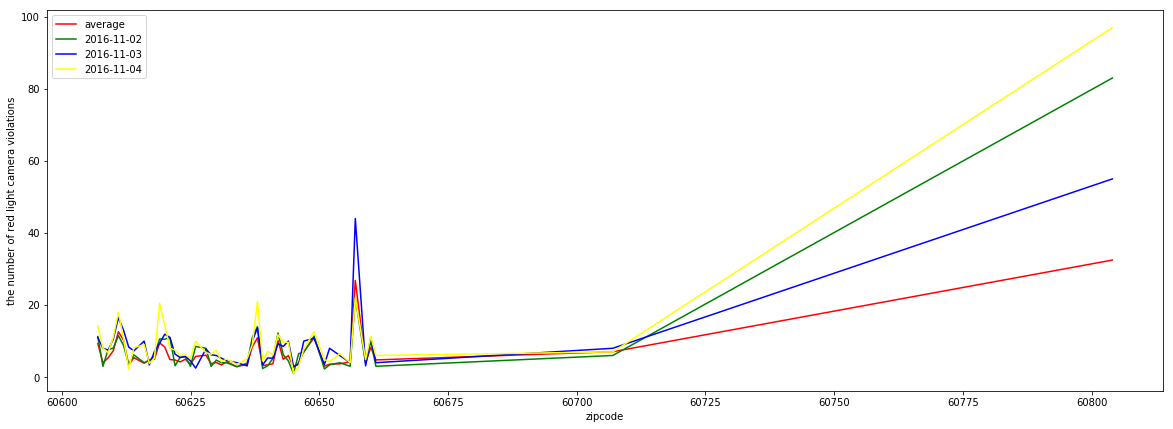

In [198]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

zipcodes = []
violations4=[]
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE group by zipcode order by zipcode;")
for row in cursor:
    zipcodes.append(row[0])
    violations4.append(float(row[1]))
    
violations5 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-02' group by zipcode order by zipcode;")
for row in cursor:
    violations5.append(float(row[1]))

violations6 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-03' group by zipcode order by zipcode;")
for row in cursor:
    violations6.append(float(row[1]))

violations7 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-04' group by zipcode order by zipcode;")
for row in cursor:
    violations7.append(float(row[1]))    
print(len(violations4),len(violations5), len(violations6),len(violations7))

conn.close()
plt.figure(figsize=(20,7))

plt.xlabel("zipcode")
plt.ylabel("the number of red light camera violations")
plt.plot(zipcodes, violations4,c='red',label='average')
plt.plot(zipcodes, violations5,c='green',label='2016-11-02')
plt.plot(zipcodes, violations6,c='blue',label='2016-11-03')
plt.plot(zipcodes, violations7,c='yellow',label='2016-11-04')

plt.legend()
plt.show()

### 每一年感恩节和violation的关系

48 48 48 48


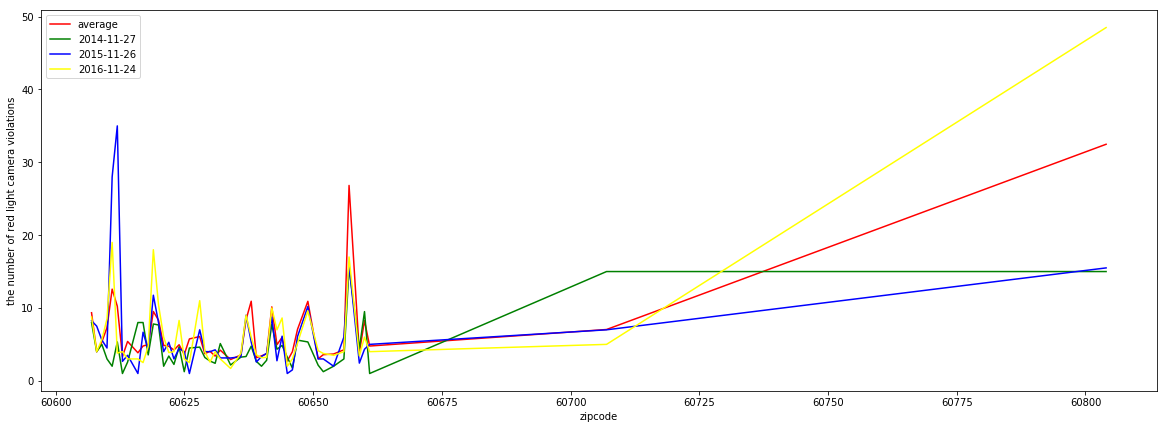

In [200]:
conn = sqlite3.connect('database.db')
c = conn.cursor()

zipcodes = []
violations4=[]
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE group by zipcode order by zipcode;")
for row in cursor:
    zipcodes.append(row[0])
    violations4.append(float(row[1]))
    
violations8 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2014-11-27'group by zipcode order by zipcode;")
for row in cursor:
    violations8.append(float(row[1]))

violations9 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2015-11-26'  group by zipcode order by zipcode;")
for row in cursor:
    violations9.append(float(row[1]))

violations10 = []
cursor = c.execute("select zipcode, avg(violation) from weather as w join violation as v \
                   on w.DATE=v.DATE where v.DATE='2016-11-24'  group by zipcode order by zipcode;")
for row in cursor:
    violations10.append(float(row[1]))    
print(len(violations4),len(violations8), len(violations9),len(violations10))

conn.close()
plt.figure(figsize=(20,7))

plt.xlabel("zipcode")
plt.ylabel("the number of red light camera violations")
plt.plot(zipcodes, violations4,c='red',label='average')
plt.plot(zipcodes, violations8,c='green',label='2014-11-27')
plt.plot(zipcodes, violations9,c='blue',label='2015-11-26')
plt.plot(zipcodes, violations10,c='yellow',label='2016-11-24')
plt.legend()
plt.show()

### 日期和violation的关系

Opened database successfully
Operation done successfully


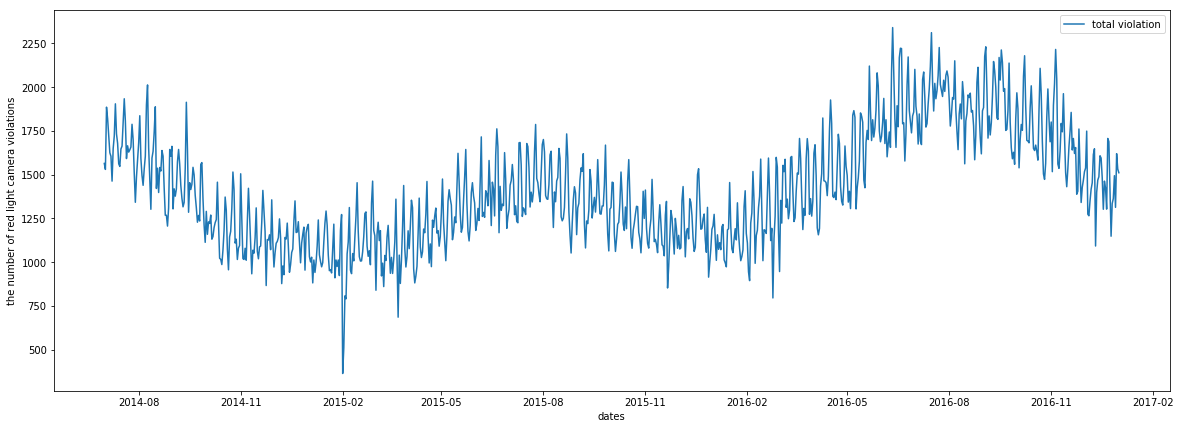

In [278]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, sum(violation) as violation from weather as w join violation as v \
                   on w.DATE=v.DATE group by w.DATE ORDER BY w.DATE")
dates = []
violations = []
weekdays=[]
for row in cursor:
    current_date=datetime.strptime(row[0],"%Y-%m-%d")
    weekday=current_date.strftime("%w")
    dates.append(current_date)
    weekdays.append(weekday)
    violations.append(float(row[1]))
    
print("Operation done successfully")
conn.close()

plt.figure(figsize=(20,7))

plt.xlabel("dates")
plt.ylabel("the number of red light camera violations")
plt.plot(dates,violations,label='total violation')
plt.legend()
plt.show()

### 星期和violation的关系

Opened database successfully
Operation done successfully


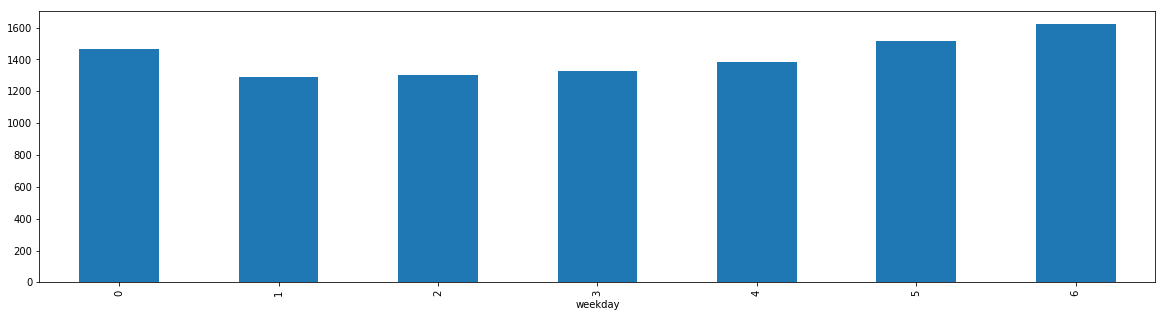

In [276]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, sum(violation) as violation from weather as w join violation as v \
                   on w.DATE=v.DATE group by w.DATE ORDER BY w.DATE")

violations = []
weekdays=[]

for row in cursor:
    current_date=datetime.strptime(row[0],"%Y-%m-%d")
    weekday=current_date.strftime("%w")
    
    weekdays.append(weekday)
    
    violations.append(float(row[1]))
    
print("Operation done successfully")
conn.close()

d={'weekday': weekdays,'month':months, 'violation': violations}
df=pd.DataFrame(data=d)

df_weekday=df.groupby(['weekday'])['violation'].mean()
df_weekday.plot(kind='bar', figsize = (20, 5))





### 月份和violation的关系

Opened database successfully
Operation done successfully


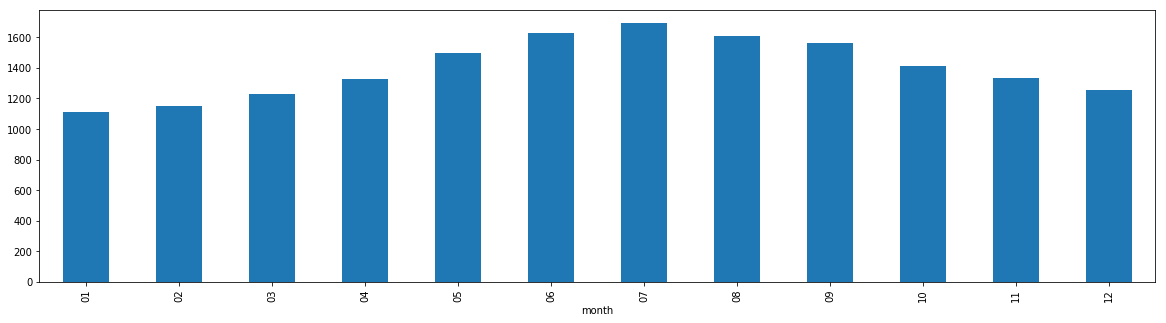

In [277]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, sum(violation) as violation from weather as w join violation as v \
                   on w.DATE=v.DATE group by w.DATE ORDER BY w.DATE")

violations = []
months=[]

for row in cursor:
    current_date=datetime.strptime(row[0],"%Y-%m-%d")
    month=current_date.strftime("%m")
    months.append(month)
    violations.append(float(row[1]))
    
print("Operation done successfully")
conn.close()

d={'weekday': weekdays,'month':months, 'violation': violations}
df=pd.DataFrame(data=d)


df_month=df.groupby(['month'])['violation'].mean()
df_month.plot(kind='bar', figsize = (20, 5))

### 摄像头数量和日期的关系

Opened database successfully
Operation done successfully


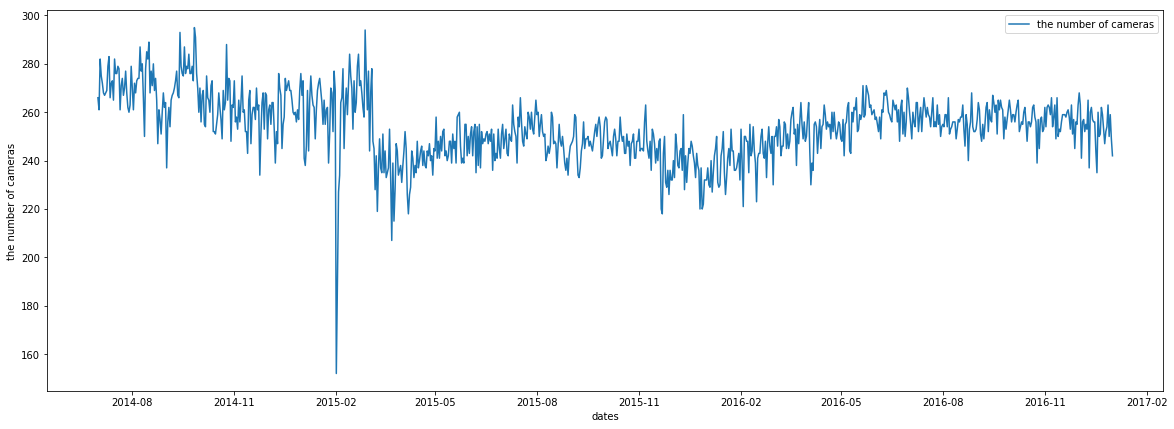

In [169]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, count(cameraid) as camera from weather as w join violation as v \
                   on w.DATE=v.DATE group by w.DATE ORDER BY w.DATE")
dates = []
cameras = []
for row in cursor:
    current_date=datetime.strptime(row[0],"%Y-%m-%d")
    dates.append(current_date)
    cameras.append(float(row[1]))
print("Operation done successfully")
conn.close()

plt.figure(figsize=(20,7))

plt.xlabel("dates")
plt.ylabel("the number of cameras")
plt.plot(dates,cameras,label='the number of cameras')
plt.legend()
plt.show()

### 天气和超速的关系

Opened database successfully
Operation done successfully
         date  precipitation  temprature  violation
0  2015-02-19       0.000000           2   4.011364
1  2016-12-19       0.000000           2   5.626923
2  2016-01-18       0.000000           3   4.761062
3  2015-01-08       0.002703           3   3.769811
4  2015-01-05       0.000000           5   3.581301


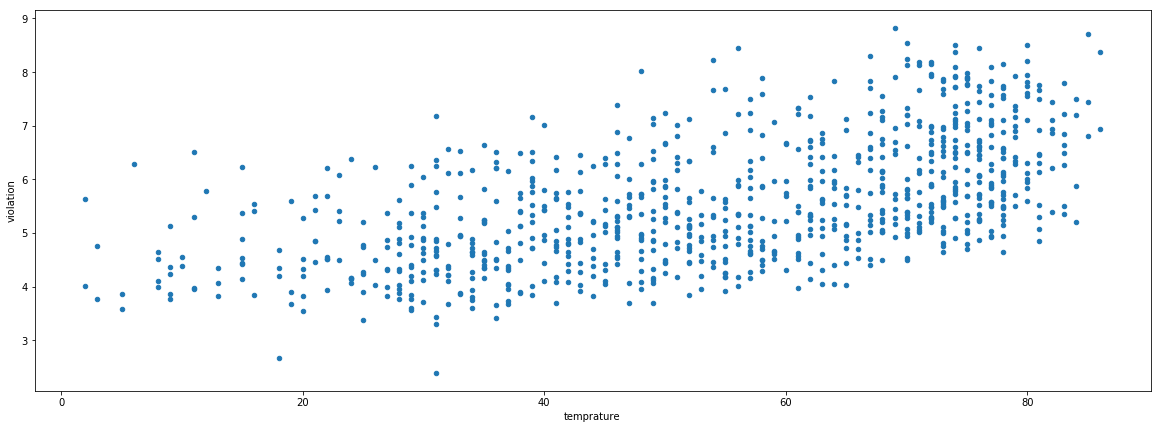

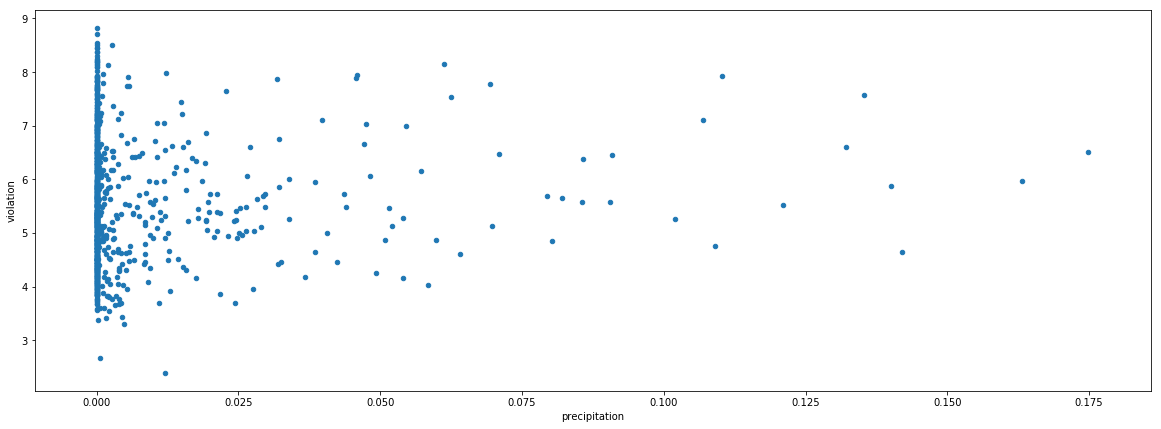

In [234]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, avg(violation), w.TEMPERATURE,w.PRECIPITATION from weather as w join \
violation as v on w.DATE=v.DATE where TEMPERATURE>=0 group by w.DATE order by w.TEMPERATURE;")
dates = []
violations = []
temps = []
precs = []
for row in cursor:
    dates.append(row[0])
    violations.append(float(row[1]))
    temps.append(round(row[2]))
    precs.append(float(row[3]))
print("Operation done successfully")
conn.close()

d={'date': dates, 'violation': violations,'temprature': temps,'precipitation': precs}
df=pd.DataFrame(data=d)
print(df.head())


df.plot.scatter(x='temprature', y='violation',figsize=(20,7))
df.plot.scatter(x='precipitation', y='violation',figsize=(20,7))



### Regression

Opened database successfully
Operation done successfully
         date  precipitation  temprature  violation
0  2014-07-01       0.140000   72.295745   5.879699
1  2014-07-02       0.002414   68.200000   5.862069
2  2014-07-03       0.005333   63.496667   6.687943
3  2014-07-04       0.000000   70.066667   6.614545
4  2014-07-05       0.000000   72.029167   6.334559


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              violation   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 29 Nov 2017   Prob (F-statistic):           8.78e-78
Time:                        20:15:08   Log-Likelihood:                -1242.8
No. Observations:                 914   AIC:                             2492.
Df Residuals:                     911   BIC:                             2506.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7480      0.093     40.387      0.000       3.566       3.930
temprature        0.0340      0.002     20.711      0.000       0.031       0.037
precipitation    -3.6668      1.688     -2.172      0.030      -6.980      -0.354
==============================================================================
Omnibus:                       38.024   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.875
Skew:                           0.447   Prob(JB):                     9.83e-09
Kurtosis:                       2.590   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

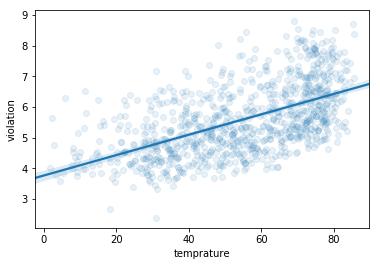

In [235]:
conn = sqlite3.connect('database.db')
c = conn.cursor()
print("Opened database successfully")
cursor = c.execute("select w.DATE, avg(violation), w.TEMPERATURE,w.PRECIPITATION from weather as w join \
violation as v on w.DATE=v.DATE where TEMPERATURE>=0 group by w.DATE order by w.DATE;")
dates = []
violations = []
temps = []
precs = []
for row in cursor:
    dates.append(row[0])
    violations.append(float(row[1]))
    temps.append(float(row[2]))
    precs.append(float(row[3]))
print("Operation done successfully")
conn.close()

d={'date': dates, 'violation': violations,'temprature': temps,'precipitation': precs}
df=pd.DataFrame(data=d)
print(df.head())

from scipy import stats
import statsmodels.formula.api as sm

import seaborn as sns

sns.regplot(x = "temprature", y = "violation", data = df, scatter_kws = {"alpha" : 0.1});

result = sm.ols(formula="violation~ temprature+ precipitation", data=df).fit()
result.summary()